In [8]:
import sys
import numpy as np

import cantera as ct
import matplotlib.pyplot as plt
# import struct
# import os

In [9]:
# The simulation integrates in time for these values:
nstep = 10000
step_size = 1.e-7

# Defines the homogeneous mixture properties for use in the reactor
# COH2.cti is the chemical input file generated from the CHEMKIN files

#To generate the .cti file do: (see> man ck2cti)
#       ck2cti --input=chem.inp --thermo=therm.dat --transport=trans.dat 

gas = ct.Solution('chem_Lietal.cti')
# gas = ct.Solution('LiDryer_H2.cti')

In [10]:
data_1bar = np.zeros(shape=(nstep,11))

In [11]:
T_in = 1100
P_in = ct.one_atm * 1
gas.TP = T_in, P_in
phi=0.35
#g.X = 'H2:0.00811, O2:0.18316, N2:0.75691, H2O:0.05182'
#print(g.get_equivalence_ratio('O2'))
gas.set_equivalence_ratio(phi, {'H2':1.0}, {'O2':0.14440, 'N2':0.68155, 'H2O':0.07256})
# gas.set_equivalence_ratio(phi, {'H2':1.0}, {'O2':1, 'N2':3.76})


In [12]:
# 'r' is the name of the object which repreesntes your reactor
# Here, r is a constant pressure reactor which solves the conservation 
# of species and energy equation
# The mixture properties are passed into the call to set the initial condition
r = ct.IdealGasConstPressureReactor(gas)

# sim is the object which represents the progress in time of the reactor
sim = ct.ReactorNet([r])
time = 0.0


In [13]:
#Here output is just to screen, can call routines to save to .csv or other files
# see numpy documentation

# To get ignition delay time, store array of T and time, define ignition as, say
# max(dT/dt)
dtdT = np.zeros(shape=(nstep,2))
grdT = np.zeros(shape=(nstep,1))

#print('%10s %10s %10s %14s' % ('t [s]','T [K]','P [Pa]','u [J/kg]'))
for n in range(nstep):
    time += step_size
# Integrates the solution in time
    sim.advance(time)
    data_1bar[n,0:9]=r.Y
    data_1bar[n,9]=r.T


    dtdT[n,0] = sim.time
    dtdT[n,1] = r.T
data_1bar[:,10] = P_in

In [14]:
max_index = np.argmax(np.gradient(dtdT[:,1]/np.gradient(dtdT[:,0])))
print(max_index)
print('autoignition delay time at Temp:%10.3f and pressure:%10.3f is %14.6e ms' % (T_in, P_in, dtdT[max_index,0]*1000))

1285
autoignition delay time at Temp:  1100.000 and pressure:101325.000 is   1.286000e-01 ms


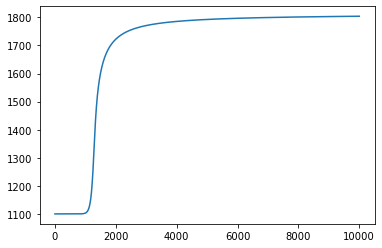

In [16]:
plt.plot(data_1bar[:,9])